In [1]:
# Note that this works in the segment version with temperature dependant properties
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from Segment import Segment, Body

In [2]:
# temstep updating function for testing 

def lsp_10(pname, a, tsets):
    def lm(body_tree, body_params):
        base = body_tree.get_param(pname, True)
        temp = body_tree.get_temps()
        nprms = list(base + (a * base * (temp - tsets)))
        return nprms
    return lm 

In [3]:
# Now building a body out of the segments 

tree = Segment(171380, 4.305, 59.539, "Torso")
tree.add_child(51.70, Segment(17556.0, 13.423, 17.3, "Head"))
tree.add_child(5.45, 
               Segment(9041.34, 0.814, 1.264, "LUArm").add_child(2.65,
               Segment(5739.14, 0.534, 0.271, "LFArm").add_child(1.20,
               Segment(1400.3, 0.369, 0.140, "LHand"))))
tree.add_child(5.45, 
               Segment(9041.34, 0.814, 1.264, "RUArm").add_child(2.65,
               Segment(5739.14, 0.534, 0.271, "RFArm").add_child(1.20,
               Segment(1400.3, 0.369, 0.140, "RHand"))))
tree.add_child(2.72, 
               Segment(29314.3, 1.640, 1.440, "LThigh").add_child(0.85,
               Segment(13973.7, 0.879, 0.380, "LLeg").add_child(0.56,
               Segment(2006.4, 0.456, 0.313, "LFoot"))))
tree.add_child(2.72, 
               Segment(29314.3, 1.640, 1.440, "RThigh").add_child(0.85,
               Segment(13973.7, 0.879, 0.380, "RLeg").add_child(0.56,
               Segment(2006.4, 0.456, 0.313, "RFoot"))))

In [4]:
body = Body(tree)

In [5]:
settemps = np.array([35.0, 36.1, 
                     34.4, 34.9, 35.3, 
                     34.4, 34.9, 35.3,
                     34.8, 34.3, 34.6,
                     34.8, 34.3, 34.6
                    ])
#body.register_tree_update("env", lsp_10("env", 0.1, settemps))
#body.register_tree_update("qmet", lsp_10("qmet", -0.1, settemps))

body.register_log_parameter("temp", "tree")
body.register_log_parameter("qmet", "tree")
body.register_log_parameter("env", "tree")

In [6]:
log = body.run_constant_temp(1, 0, 100000)
tvals = np.asarray(log["temp"])

In [7]:
names = body.body_tree.get_names() 

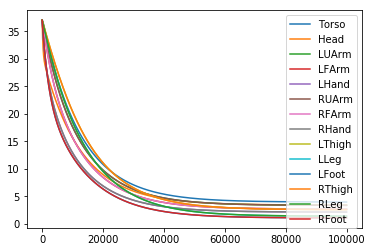

In [8]:
fig_t = plt.figure()
ax_t = fig_t.add_subplot(111)
for i, name in enumerate(names):
    ax_t.plot(tvals[:,i], label=name)

ax_t.legend()

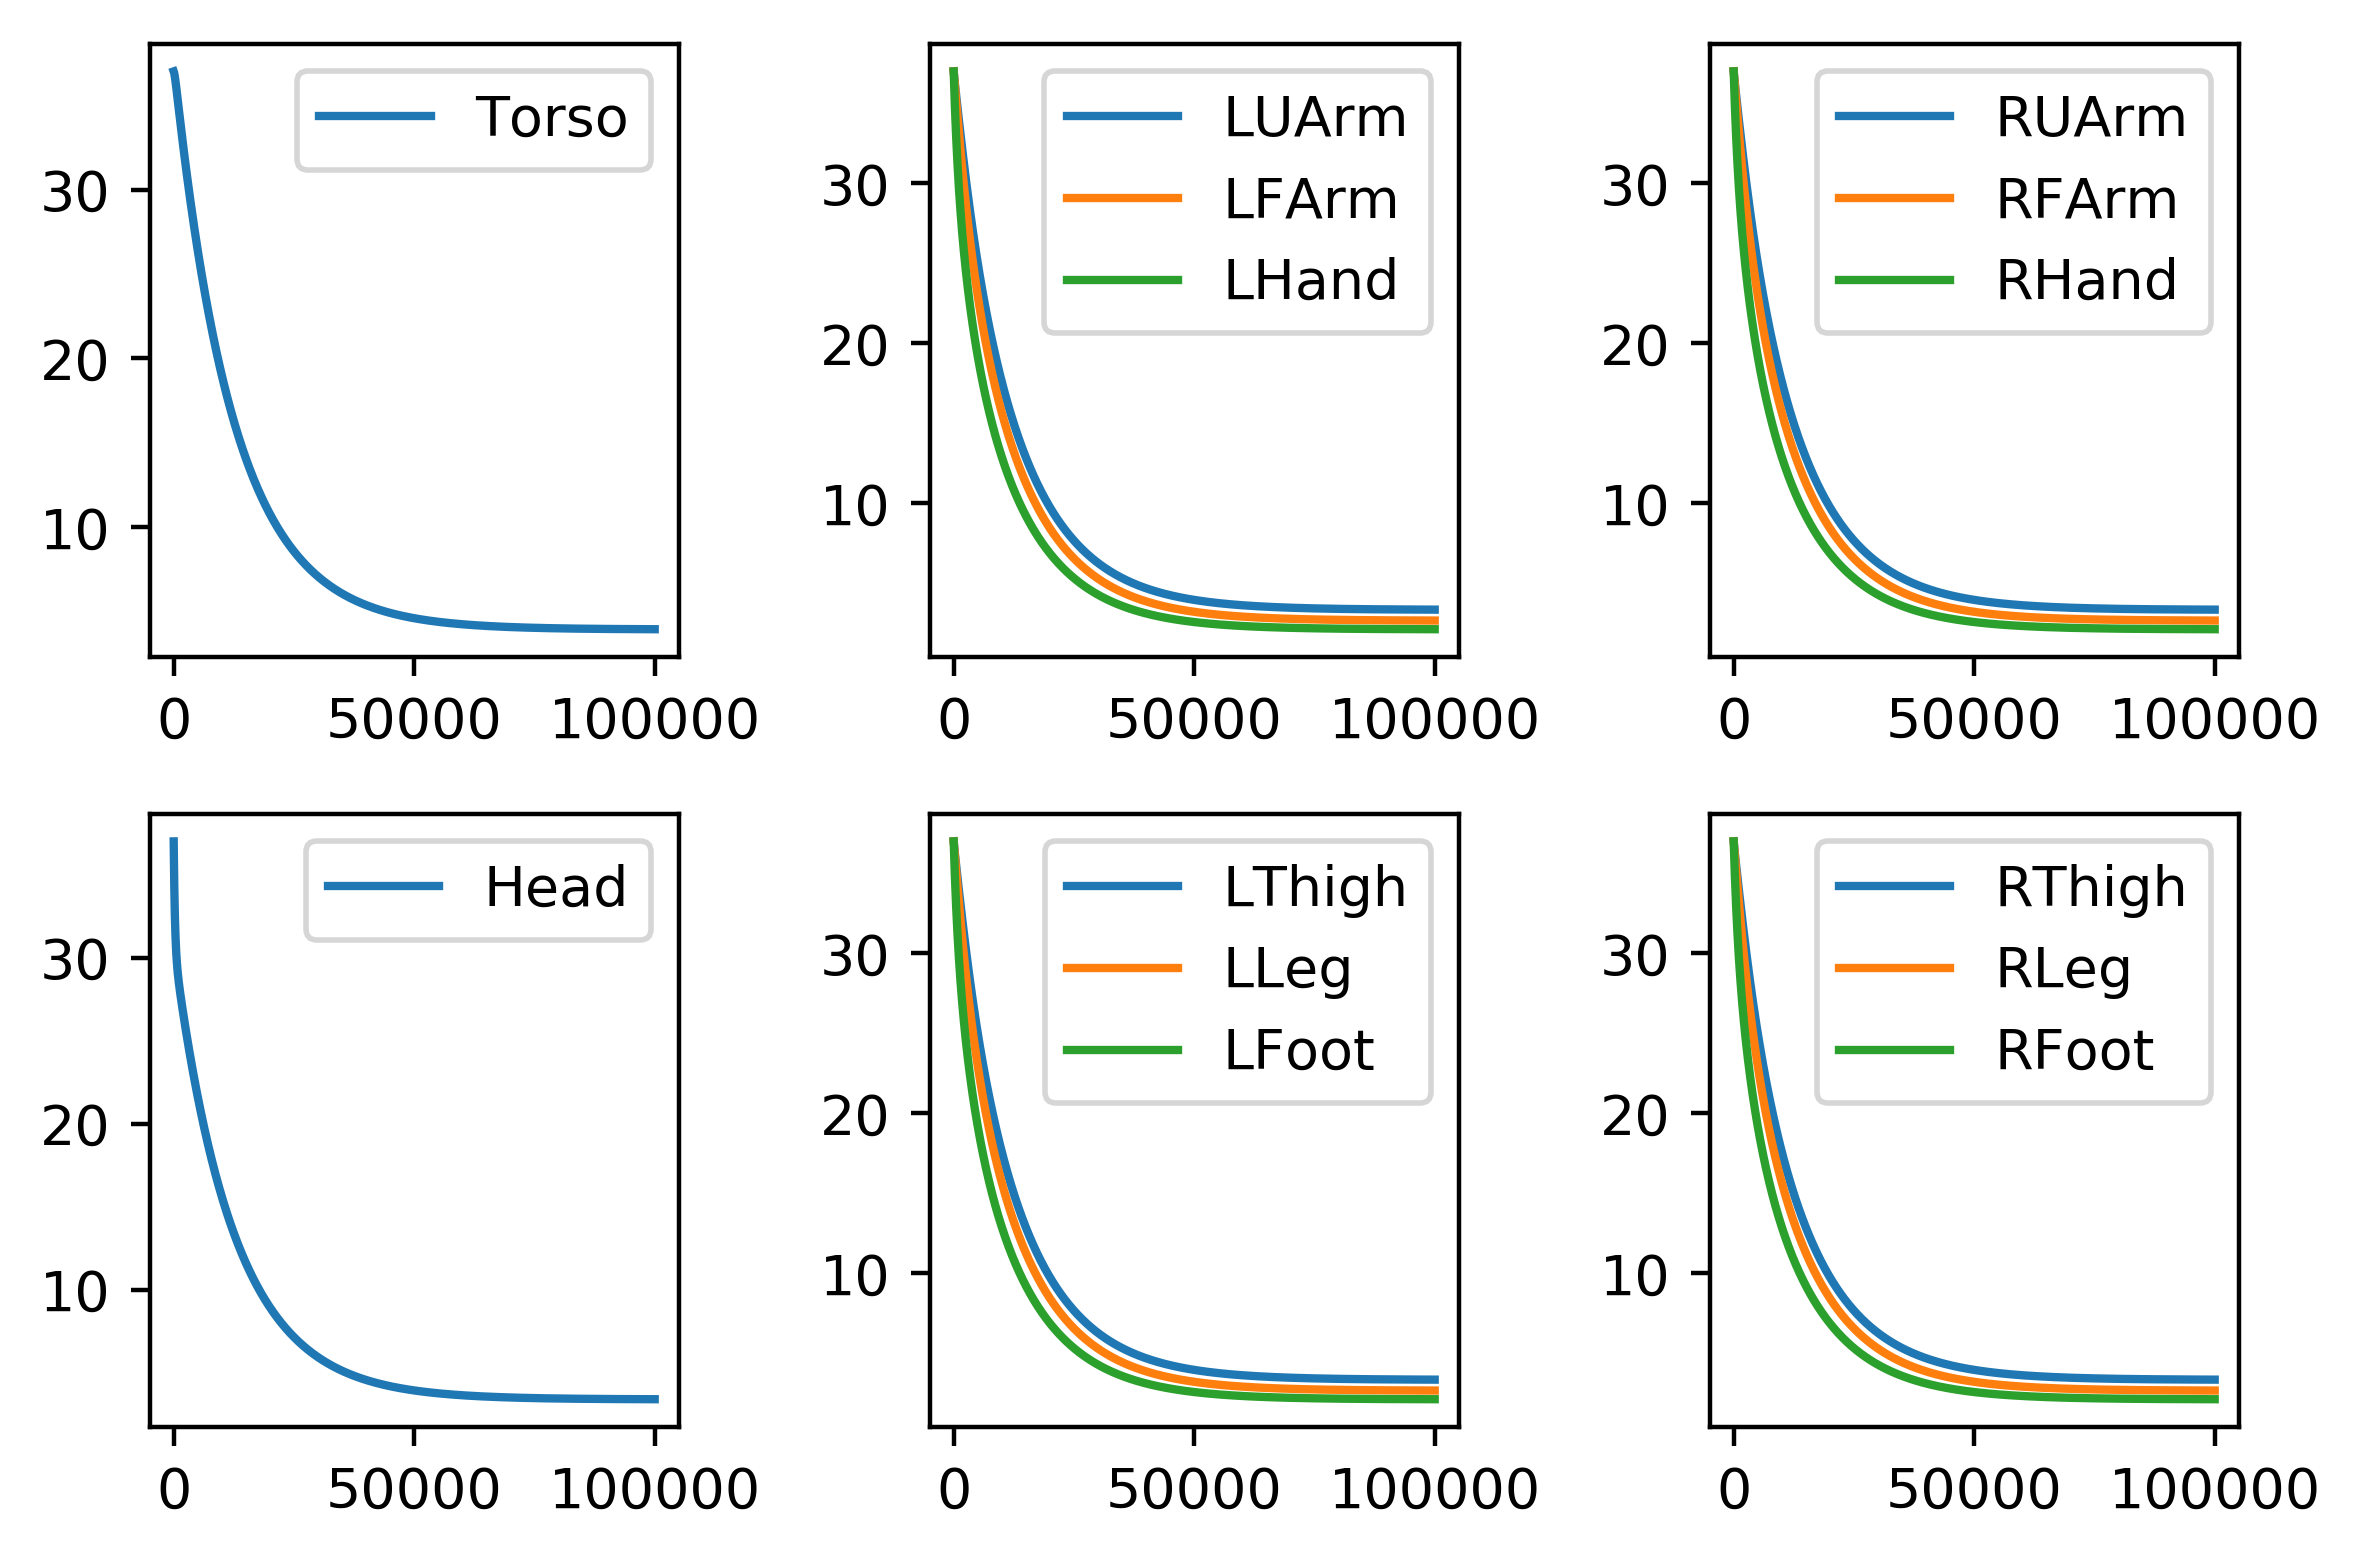

In [9]:
fig_p = plt.figure(dpi=400)

# Torso plot
ax_t = fig_p.add_subplot(231)
ax_t.plot(tvals[:,0], label=names[0])
ax_t.legend()

# Head plot
ax_h = fig_p.add_subplot(234)
ax_h.plot(tvals[:,1], label=names[1])
ax_h.legend()

# Left Arm
ax_la = fig_p.add_subplot(232)
for i, name in enumerate(names[2:5]):
    ax_la.plot(tvals[:,2+i], label=name)
ax_la.legend()

# Right Arm
ax_ra = fig_p.add_subplot(233)
for i, name in enumerate(names[5:8]):
    ax_ra.plot(tvals[:,2+i], label=name)
ax_ra.legend()

# Left Leg
ax_ll = fig_p.add_subplot(235)
for i, name in enumerate(names[8:11]):
    ax_ll.plot(tvals[:,2+i], label=name)
ax_ll.legend()

# Right Leg
ax_rl = fig_p.add_subplot(236)
for i, name in enumerate(names[11:]):
    ax_rl.plot(tvals[:,2+i], label=name)
ax_rl.legend()

fig_p.tight_layout()

In [10]:
qmets = np.asarray(log["qmet"])

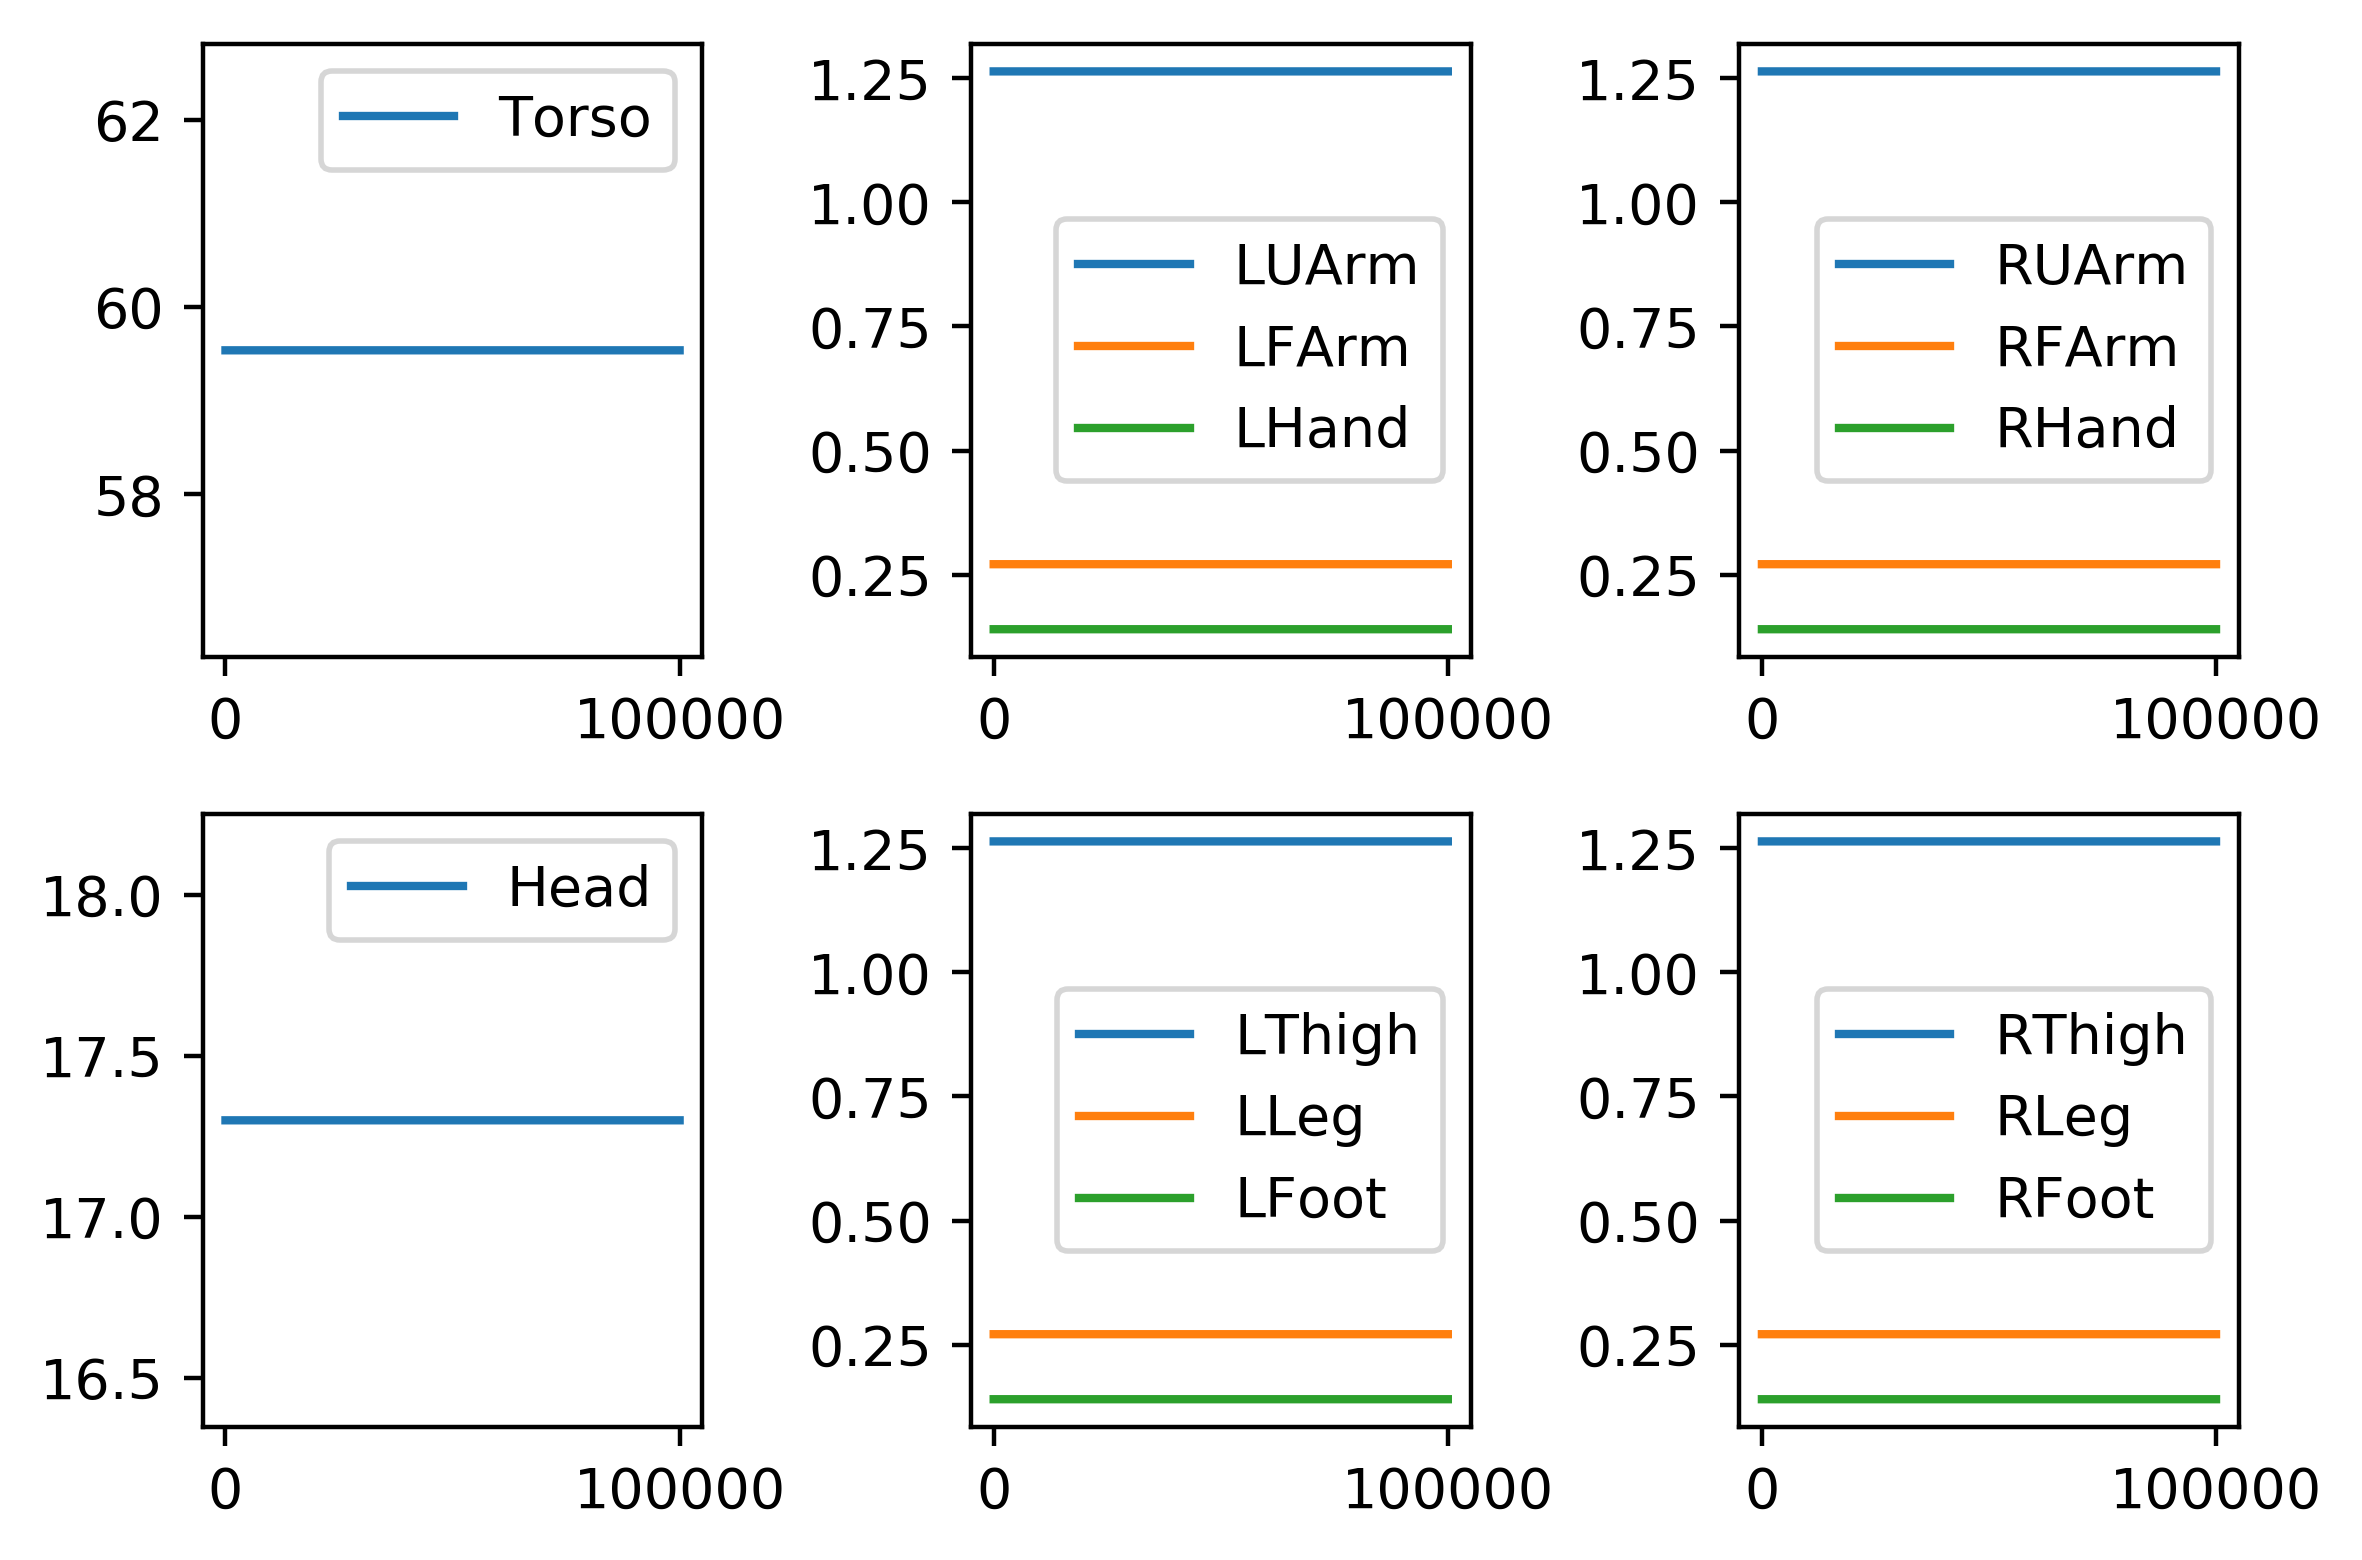

In [11]:
fig_q = plt.figure(dpi=400)

# Torso plot
ax_t = fig_q.add_subplot(231)
ax_t.plot(qmets[:,0], label=names[0])
ax_t.legend()

# Head plot
ax_h = fig_q.add_subplot(234)
ax_h.plot(qmets[:,1], label=names[1])
ax_h.legend()

# Left Arm
ax_la = fig_q.add_subplot(232)
for i, name in enumerate(names[2:5]):
    ax_la.plot(qmets[:,2+i], label=name)
ax_la.legend()

# Right Arm
ax_ra = fig_q.add_subplot(233)
for i, name in enumerate(names[5:8]):
    ax_ra.plot(qmets[:,2+i], label=name)
ax_ra.legend()

# Left Leg
ax_ll = fig_q.add_subplot(235)
for i, name in enumerate(names[8:11]):
    ax_ll.plot(qmets[:,2+i], label=name)
ax_ll.legend()

# Right Leg
ax_rl = fig_q.add_subplot(236)
for i, name in enumerate(names[11:]):
    ax_rl.plot(qmets[:,2+i], label=name)
ax_rl.legend()

fig_q.tight_layout()

In [12]:
envs = np.asarray(log["env"])

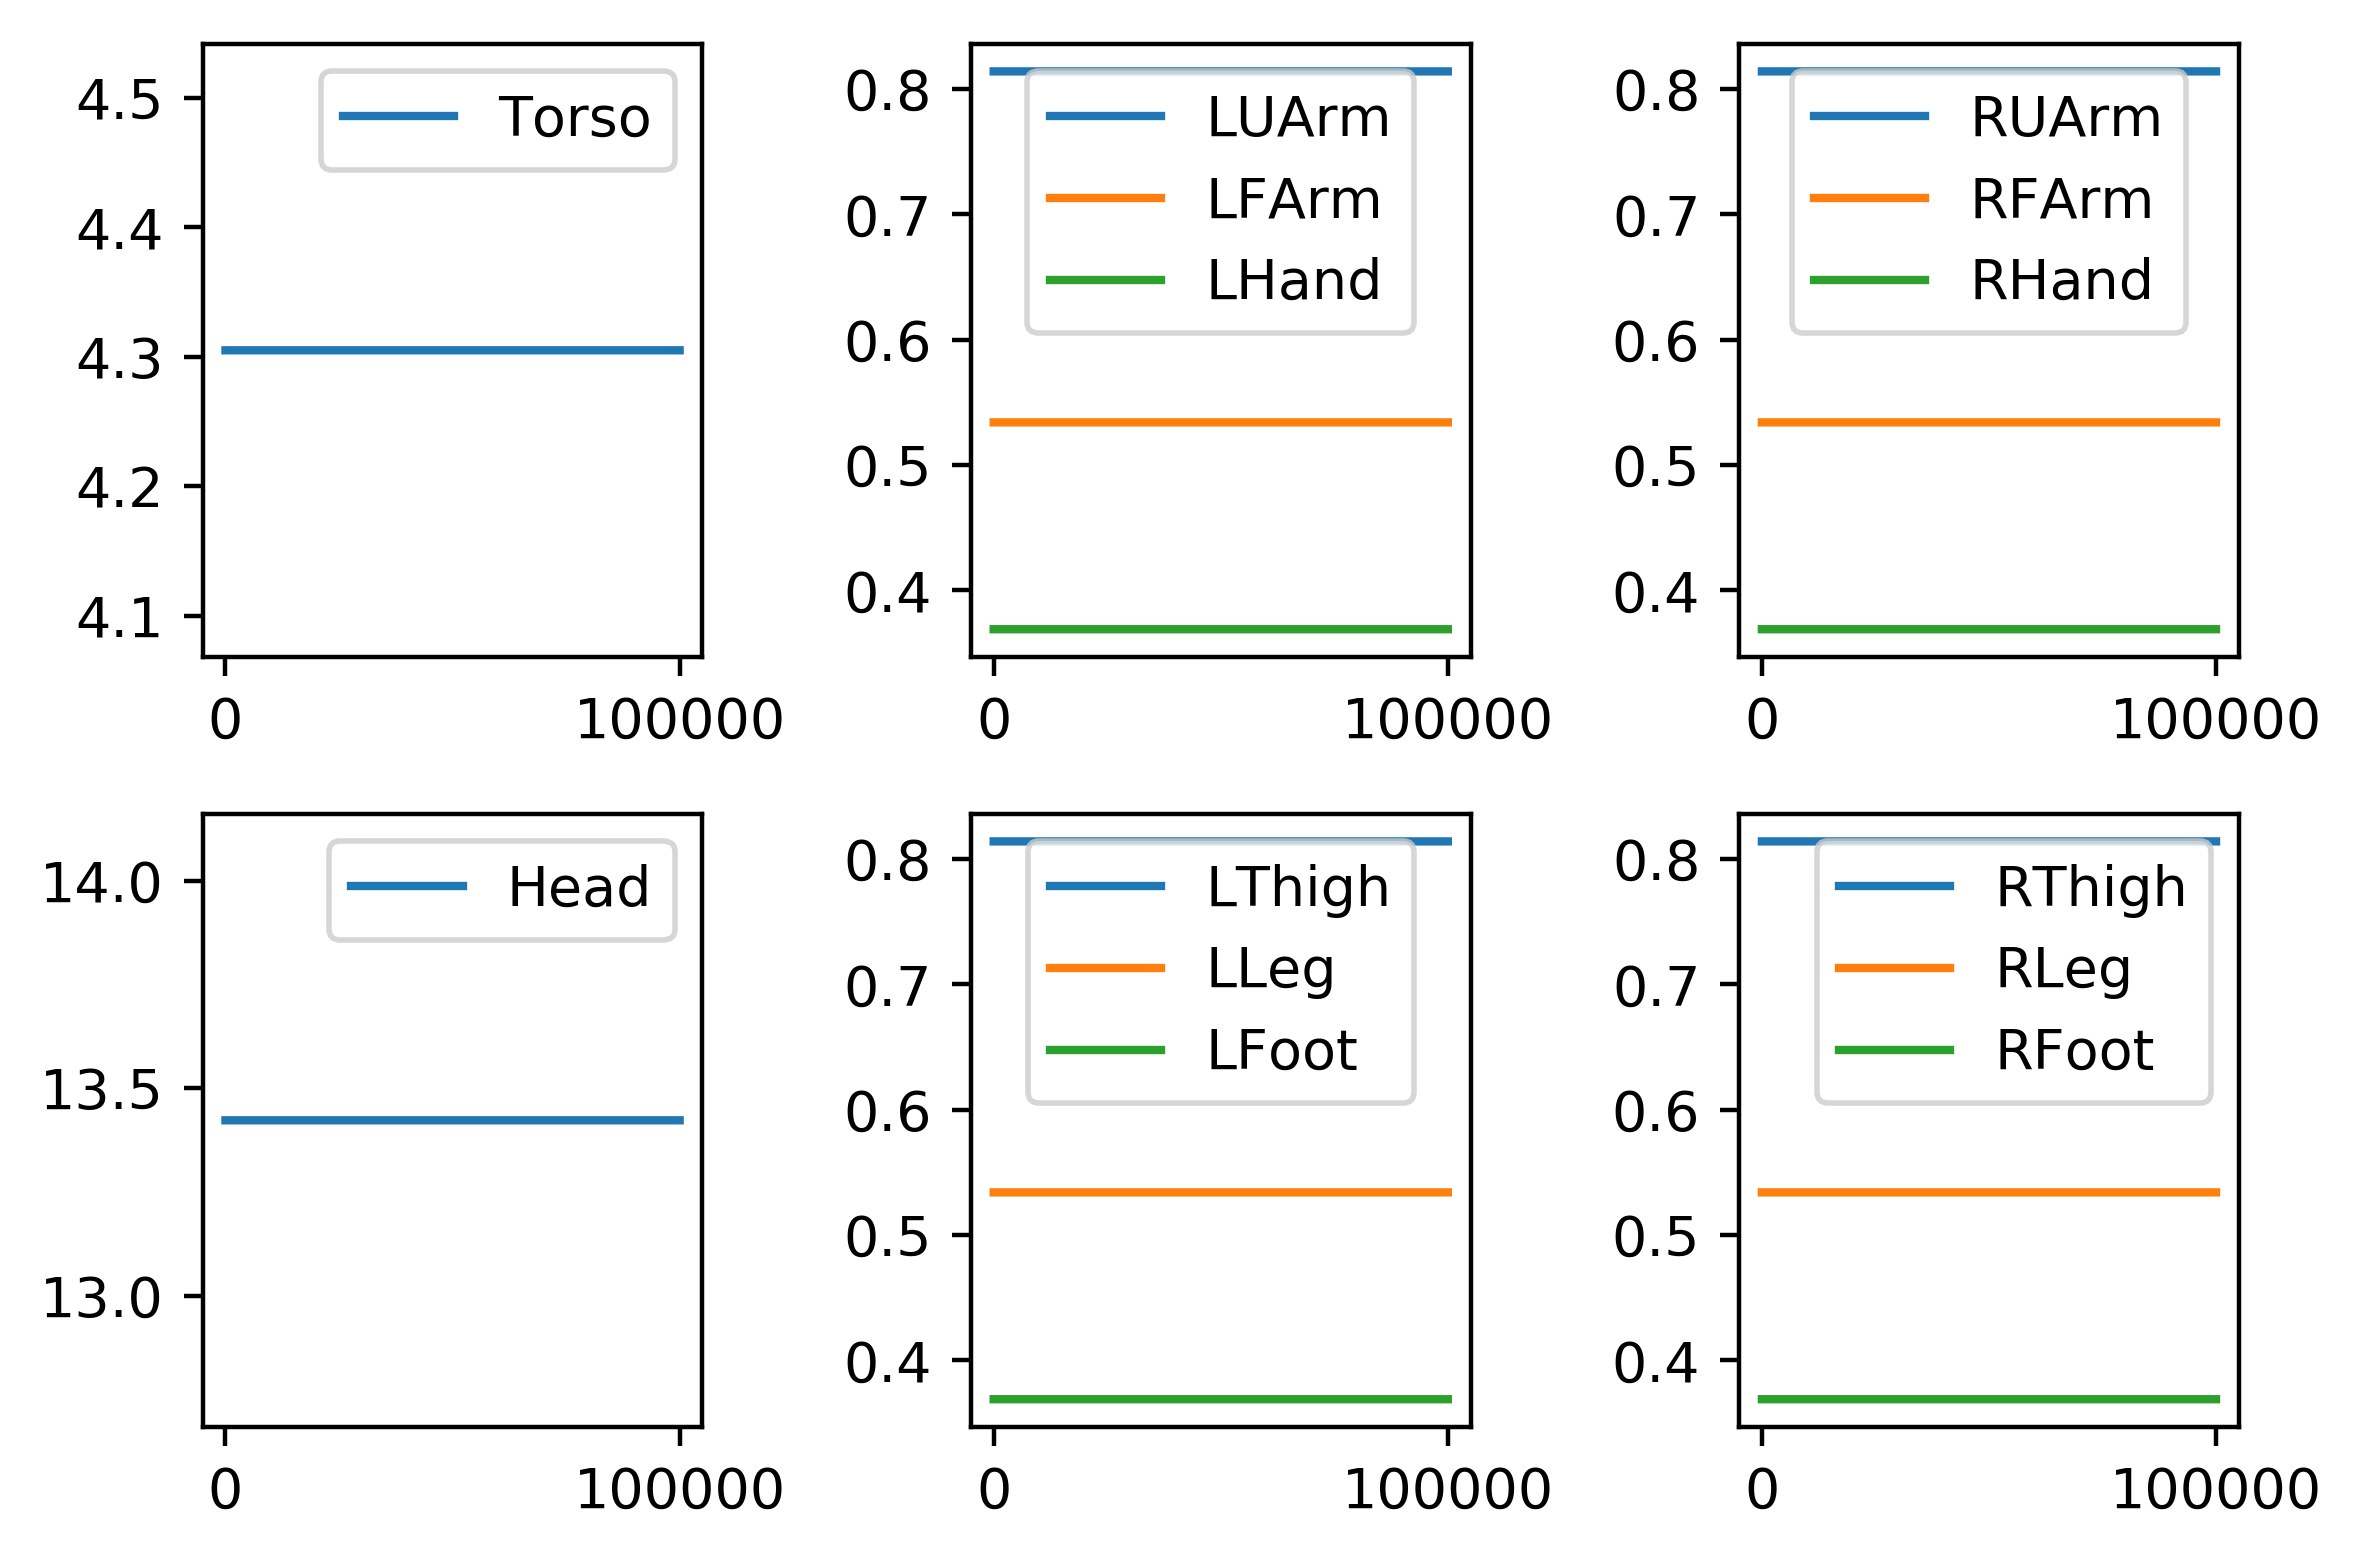

In [13]:
fig_e = plt.figure(dpi=400)

# Torso plot
ax_t = fig_e.add_subplot(231)
ax_t.plot(envs[:,0], label=names[0])
ax_t.legend()

# Head plot
ax_h = fig_e.add_subplot(234)
ax_h.plot(envs[:,1], label=names[1])
ax_h.legend()

# Left Arm
ax_la = fig_e.add_subplot(232)
for i, name in enumerate(names[2:5]):
    ax_la.plot(envs[:,2+i], label=name)
ax_la.legend()

# Right Arm
ax_ra = fig_e.add_subplot(233)
for i, name in enumerate(names[5:8]):
    ax_ra.plot(envs[:,2+i], label=name)
ax_ra.legend()

# Left Leg
ax_ll = fig_e.add_subplot(235)
for i, name in enumerate(names[8:11]):
    ax_ll.plot(envs[:,2+i], label=name)
ax_ll.legend()

# Right Leg
ax_rl = fig_e.add_subplot(236)
for i, name in enumerate(names[11:]):
    ax_rl.plot(envs[:,2+i], label=name)
ax_rl.legend()

fig_e.tight_layout()